<a href="https://colab.research.google.com/github/Ratikant-rout/ISRO-CNN-PYTORCH_TRAINING/blob/main/ISRO_PYTORCH_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np

In [3]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [4]:
x_data


tensor([[1, 2],
        [3, 4]])

In [5]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [6]:
x_np

tensor([[1, 2],
        [3, 4]])

In [7]:
!pip install torchgeo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 23.7 MB/s eta 

# WORKING WITH DATA


In [1]:
import torch
from torch.utils.data import dataloader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchgeo.datasets import EuroSAT100
import torch.nn.functional as F

In [2]:
training_data = EuroSAT100(
    root="data",
    split="train",
    download=True,
)

100%|██████████| 7717354/7717354 [00:00<00:00, 21554268.51it/s]


100%|██████████| 1152/1152 [00:00<00:00, 1714633.86it/s]


100%|██████████| 383/383 [00:00<00:00, 692720.32it/s]


100%|██████████| 382/382 [00:00<00:00, 602793.13it/s]


In [3]:
test_data = EuroSAT100(
    root="data",
    split="test",
    download=True,
)

In [4]:
labels_map = {
    0: 'AnnualCrop',
    1: 'Forest',
    2: 'HerbaceousVegetation',
    3: 'Highway',
    4: 'Industrial',
    5: 'Pasture',
    6: 'PermanentCrop',
    7: 'Residential',
    8: 'River',
    9: 'SeaLake'
}

In [5]:
import matplotlib.pyplot as plt

In [6]:
training_data[0]['image'].shape

torch.Size([13, 64, 64])

In [7]:
len(training_data)

60

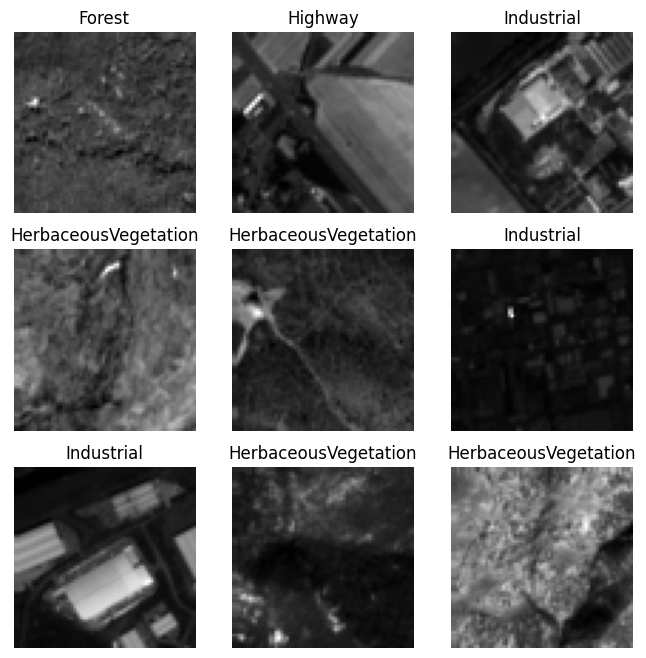

In [8]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_idx]['image'], training_data[sample_idx]['label']
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label.item()])  # Convert tensor to integer
    plt.axis('off')
    plt.imshow(img[3],cmap='gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

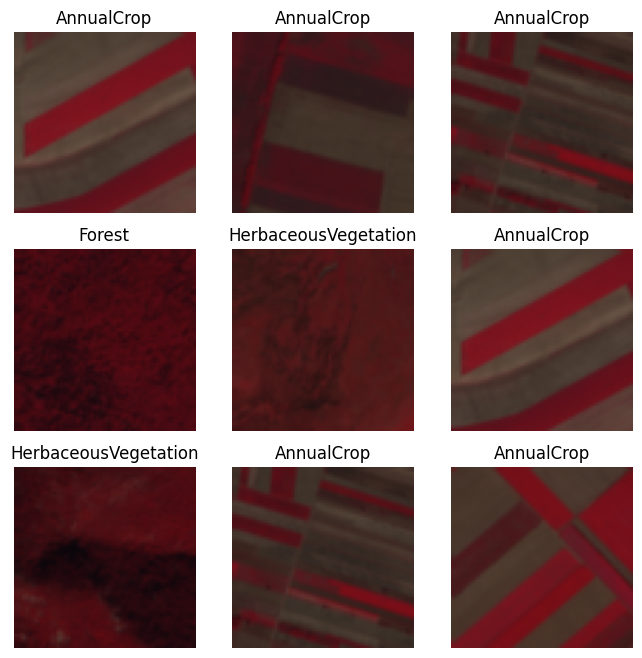

In [9]:
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(test_data),size=(1,)).item()
    data = training_data[sample_idx]
    img, label = data['image'], data['label'].item()
    img = torch.stack((img[7],img[3],img[2]),dim=0)
    img = torch.permute(img,(1,2,0))

    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])  # Convert tensor to integer
    plt.axis('off')
    plt.imshow(img/10000.)
plt.show

In [10]:
batch_size = 4

train_dataloader = dataloader.DataLoader(training_data,batch_size=batch_size,shuffle=True)
test_dataloader = dataloader.DataLoader(test_data,batch_size=batch_size,shuffle=True)

In [11]:
for data in test_dataloader:
    X = data['image']
    y = data['label']
    print(X.shape)
    print(y.shape)
    break

torch.Size([4, 13, 64, 64])
torch.Size([4])


# CREATING MODELS



In [12]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [13]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(13*64*64, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [14]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=53248, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=10, bias=True)
  )
)


In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-4)

In [16]:
def train(dataloader,model,loss_fn,optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch,img_data in enumerate(dataloader):
        X = img_data['image']
        y = img_data['label']
        X,y = X.to(device),y.to(device)
        pred = model(X)
        loss = loss_fn(pred,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 4 == 0:
          loss,current = loss.item(),(batch+1)*len(X)
          print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")



In [17]:
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss,correct = 0,0
  with torch.no_grad():
    for img_data in dataloader:
      X = img_data['image']
      y = img_data['label']
      X,y = X.to(device),y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
  return test_loss,correct


In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)

In [19]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 112.509956 [    4/   60]
loss: 540.298218 [   20/   60]
loss: 184.485367 [   36/   60]
loss: 755.690430 [   52/   60]
Test Error: 
 Accuracy: 10.0%, Avg loss: 434.555682 

Epoch 2
-------------------------------
loss: 776.315186 [    4/   60]
loss: 467.928558 [   20/   60]
loss: 433.021545 [   36/   60]
loss: 184.241486 [   52/   60]
Test Error: 
 Accuracy: 10.0%, Avg loss: 63.617817 

Epoch 3
-------------------------------
loss: 73.622253 [    4/   60]
loss: 8.443069 [   20/   60]
loss: 2.310978 [   36/   60]
loss: 5.760088 [   52/   60]
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.370140 

Epoch 4
-------------------------------
loss: 2.358661 [    4/   60]
loss: 2.208347 [   20/   60]
loss: 2.306064 [   36/   60]
loss: 2.264966 [   52/   60]
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.308410 

Epoch 5
-------------------------------
loss: 2.291962 [    4/   60]
loss: 2.318959 [   20/   60]
loss: 2.204329 [   36/   60]
loss: 2.253175 [   52

# For prediction Purpose

In [20]:
sample_idx = torch.randint(len(test_data),size=(1,)).item()
model.eval()
X = test_data[sample_idx]['image']
y = test_data[sample_idx]['label']
with torch.no_grad():
  x = X.unsqueeze(0)
  pred = model(x)
  predicted, actual = labels_map[pred[0].argmax(0).item()], labels_map[y.item()]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')


Predicted: "Forest", Actual: "SeaLake"


Predicted: "Forest", Actual: "River"


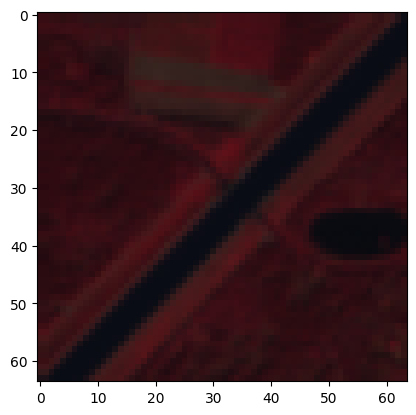

In [21]:
#Now See for image
sample_idx = torch.randint(len(test_data),size=(1,)).item()
model.eval()
X = test_data[sample_idx]['image']
y = test_data[sample_idx]['label']
with torch.no_grad():
  x = X.unsqueeze(0)
  pred = model(x)
  predicted, actual = labels_map[pred[0].argmax(0).item()], labels_map[y.item()]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')
  img = torch.stack((X[7],X[3],X[2]),dim=0)
  img = torch.permute(img,(1,2,0))
  plt.imshow(img/10000.)
  plt.show


# IMPLEMENTING CNN


In [53]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet,self).__init__()
    self.conv1 = nn.Conv2d(13,6,5)
    self.pool = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.conv3 = nn.Conv2d(16,120,5)
    self.flat = nn.Flatten()
    self.fc1 = nn.Linear(120*9*9,120)
    self.fc2 = nn.Linear(120,64)
    self.fc3 = nn.Linear(64,10)

  def forward(self,x):
    x = self.pool(nn.functional.relu(self.conv1(x)))
    x = self.pool(nn.functional.relu(self.conv2(x)))
    x = nn.functional.relu(self.conv3(x))
    x = self.flat(x)
    x = nn.functional.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.fc3(x)
    return x

def num_flat_features(self,x):
  size = x.size()[1:]
  num_features = 1
  for s in size:
    num_features *= s
  return num_features

net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(13, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=9720, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [54]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=1e-5)

Predicted: "Industrial", Actual: "Highway"
tensor([[ 14.9307,   3.0424,  -0.1413, -49.1260,  15.2529,   2.5879,  -1.2048,
          11.4104,   7.4407, -19.9409]])
tensor(3)


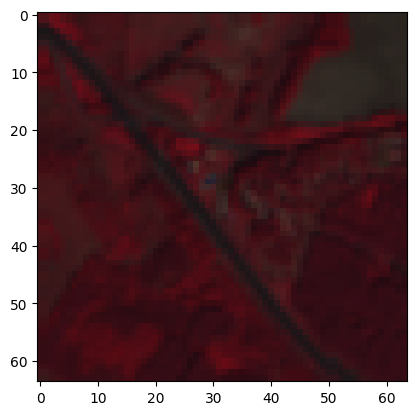

In [64]:
sample_idx = torch.randint(len(test_data),size=(1,)).item()
model.eval()
X = test_data[sample_idx]['image']
y = test_data[sample_idx]['label']
with torch.no_grad():
  x = X.unsqueeze(0)
  x = x.to(device)
  pred = net(x)
  predicted, actual = labels_map[pred[0].argmax(0).item()], labels_map[y.item()]
  print(f'Predicted: "{predicted}", Actual: "{actual}"')
  img = torch.stack((X[7],X[3],X[2]),dim=0)
  img = torch.permute(img,(1,2,0))
  plt.imshow(img/10000.)
  plt.show
  print(pred)
  print(y)